<a href="https://colab.research.google.com/github/Amzilynn/delivery_ML/blob/main/Projet_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**

  1.**Supervised**  

  **Problem Statement:**
  
  The current lack of a reliable delivery time estimate leads to poor customer experience. Customers become frustrated when their order is late, which results in increased customer service inquiries, negative reviews, and a higher risk of losing customers to competitors.


**BO (Business Objective):**
Improve the customer experience by providing an accurate estimate of delivery time.

**DSO (Data Science Objective):**
Build a regression model that predicts delivery duration (in minutes) based on order characteristics (size, restaurant category, time, delivery personnel availability, weather, accidents).


**Initial Suggested Model** : Regression Lineaire

**Evaluation Metrics** :


*   RMSE
*   MAE
*   R²

**Success Criteria :**

This project will be considered a success if the deployed model leads to a quantifiable business improvement. For instance, a measurable increase in the customer satisfaction score (Net Promoter Score) and it should also provide actionable insights that help the logistics team optimize delivery routes.

**Stakeholders :**

*   This project is crucial for the Logistics Manager, who can use the predictions to optimize delivery routes.
*   The Customer Service Team, who can use the estimates to manage customer expectations effectively.
*   The Marketing Department may also benefit from data on delivery efficiency.

2.**Unsupervised** :

**Problem Statement:**

The company receives a large number of customer orders daily, but there is no systematic analysis of order profiles. Without understanding order patterns, it is difficult to identify consumption habits and optimize marketing strategies.


**Bo (Business Objective):**
Understand customer consumption habits by analyzing order profiles, identifying characteristics in timing, items, and spending to improve marketing and operations.


**DSo (Data Science Objective):**
Cluster orders based on key patterns  (items, value, time, category,protocol) to uncover natural segments and support data-driven insights.


**Initial Suggesgted Model :** K-means


**Evaluation Metrics :**


*  High Silhouette Score

*  Low Davies-Bouldin Index


**Success Criteria :**

* Each cluster represents a clear consumption profile (e.g., high-value evening orders, quick lunchtime orders, price-sensitive customers)


* Insights from the clusters can be directly used to guide business actions (targeted marketing, personalized offers, optimized scheduling).


**Stakeholders :**

* Marketing team → uses insights to design targeted campaigns.

* Sales team → aligns offers with customer order habits.

* Data science team → develops and validates clustering models.

* Management → leverages insights for strategic decision-making.


# **II. Data Understanding**

## **Importing librairies**

Importing libraries is essential because it provides access to pre-existing functions, methods, and tools, making data analysis easier.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **II.1. Data Loading**

This allows us to access the raw data and begin exploring its structure, missing values, and data types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Dataset_ML"


datadelevry.csv  feature_columns.pkl  kmeans_model.pkl	scaler.pkl


In [ ]:
import os

file_path = "/content/drive/MyDrive/Dataset_ML/datadelevry.csv"

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    try:
        # Try reading with utf-8 first (default)
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV with utf-8: {df.shape[0]} rows, {df.shape[1]} columns")
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1
            df = pd.read_csv(file_path, encoding='latin-1')
            print(f"Successfully loaded CSV with latin-1: {df.shape[0]} rows, {df.shape[1]} columns")
        except Exception as e:
            print(f"Error loading CSV with latin-1: {e}")
            df = None # Ensure df is None if loading fails
    except Exception as e:
        print(f"An unexpected error occurred while loading CSV: {e}")
        df = None # Ensure df is None if loading fails
else:
    print(f"Error: The file was not found at {file_path}")
    df = None # Ensure df is None if file is not found

if df is not None:
    # Display the first few rows if the dataframe was loaded successfully
    display(df.head())

Successfully loaded CSV with utf-8: 172941 rows, 14 columns


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,NaN,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,NaN,1600.0,6.0,6.0,9.0


## **II.2. Dataset Overview**

This step helps to quickly understand the structure and content of the dataset.

#### Basic information about the dataset

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,NaN,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,NaN,1600.0,6.0,6.0,9.0


In [ ]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
172936,4.0,2015-01-22 20:16:46,2015-01-22 20:52:04,f023559c6d59c04e3804209f573dbff9,chinese,4.0,1.0,1067.0,1.0,942.0,942.0,75.0,74.0,74.0
172937,1.0,2015-02-04 02:37:29,2015-02-04 03:24:07,5655cf23be4dda7082c8bb3a8d8f8016,american,1.0,2.0,2550.0,2.0,950.0,1600.0,51.0,52.0,64.0
172938,2.0,2015-02-11 03:08:47,2015-02-11 03:42:07,320722549d1751cf3f247855f937b982,steak,2.0,2.0,1790.0,2.0,795.0,995.0,71.0,70.0,113.0
172939,4.0,2015-01-28 23:10:01,2015-01-28 23:38:25,6fbd841e2e4b2938351a4f9b68f12e6b,mediterranean,3.0,2.0,1750.0,2.0,450.0,1300.0,13.0,8.0,7.0
172940,2.0,2015-02-01 00:47:33,2015-02-01 01:51:13,81c650caac28cdefce4de5ddc18befa0,pizza,3.0,7.0,8150.0,5.0,500.0,2000.0,30.0,26.0,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172941 entries, 0 to 172940
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 168654 non-null  float64
 1   created_at                169541 non-null  object 
 2   actual_delivery_time      169474 non-null  object 
 3   store_id                  169489 non-null  object 
 4   store_primary_category    165369 non-null  object 
 5   order_protocol            168631 non-null  float64
 6   total_items               169453 non-null  float64
 7   subtotal                  169660 non-null  float64
 8   num_distinct_items        169489 non-null  float64
 9   min_item_price            169472 non-null  float64
 10  max_item_price            169521 non-null  float64
 11  total_onshift_partners    155613 non-null  float64
 12  total_busy_partners       155590 non-null  float64
 13  total_outstanding_orders  155624 non-null  f

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,168654.000000,168631.000000,169453.000000,169660.000000,169489.000000,169472.000000,169521.000000,155613.000000,155590.000000,155624.000000
mean,2.982414,2.850437,3.201543,2684.534174,2.678699,684.503009,1159.144708,44.813216,41.809801,58.090224
std,1.525751,1.487752,2.674022,1824.565715,1.634766,520.492937,560.203570,34.536004,32.187008,52.728748
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-3.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3397.000000,3.000000,945.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


## **II.3. Missing Values Analysis**

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df = pd.DataFrame({
        'Column': df.columns,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(info_df.to_string(index=False))


                  Column  Non_Null_Count  Null_Count  Missing_%
               market_id          168654        4287       2.48
              created_at          169541        3400       1.97
    actual_delivery_time          169474        3467       2.00
                store_id          169489        3452       2.00
  store_primary_category          165369        7572       4.38
          order_protocol          168631        4310       2.49
             total_items          169453        3488       2.02
                subtotal          169660        3281       1.90
      num_distinct_items          169489        3452       2.00
          min_item_price          169472        3469       2.01
          max_item_price          169521        3420       1.98
  total_onshift_partners          155613       17328      10.02
     total_busy_partners          155590       17351      10.03
total_outstanding_orders          155624       17317      10.01


## **II.4. Categorical Variables Analysis**

This step focuses on analyzing categorical columns in the dataset. We first identify columns with object or category data types.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
  print("CATEGORICAL COLUMNS SUMMARY:")
  for col in categorical_cols:
      unique_count = df[col].nunique()
      print(f"{col}: {unique_count} unique values")
      if unique_count <= 10:
         print(f"   Values: {df[col].value_counts().head().to_dict()}")
      else:
         print(f"   Top 5: {df[col].value_counts().head().to_dict()}")
      print()

CATEGORICAL COLUMNS SUMMARY:
created_at: 157206 unique values
   Top 5: {'2015-02-11 19:50:43': 6, '2015-01-24 01:56:33': 6, '2015-02-11 19:51:06': 5, '2015-02-16 01:48:11': 5, '2015-01-31 01:41:10': 5}

actual_delivery_time: 154909 unique values
   Top 5: {'2015-02-05 03:10:31': 6, '2015-02-16 03:51:49': 5, '2015-02-01 03:44:13': 5, '2015-01-25 02:30:15': 4, '2015-01-23 02:20:37': 4}

store_id: 5930 unique values
   Top 5: {'d43ab110ab2489d6b9b2caa394bf920f': 918, '757b505cfd34c64c85ca5b5690ee5293': 839, 'faacbcd5bf1d018912c116bf2783e9a1': 802, '45c48cce2e2d7fbdea1afc51c7c6ad26': 704, 'c9f0f895fb98ab9159f51fd0297e236d': 584}

store_primary_category: 73 unique values
   Top 5: {'american': 16736, 'pizza': 14916, 'mexican': 14005, 'burger': 9909, 'japanese': 8242}



## **II.5. Duplicate Analysis**

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df)*100):.2f}%")
print()


Number of duplicate rows: 105
Percentage: 0.06%



## **II.6. Data Visualization**

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

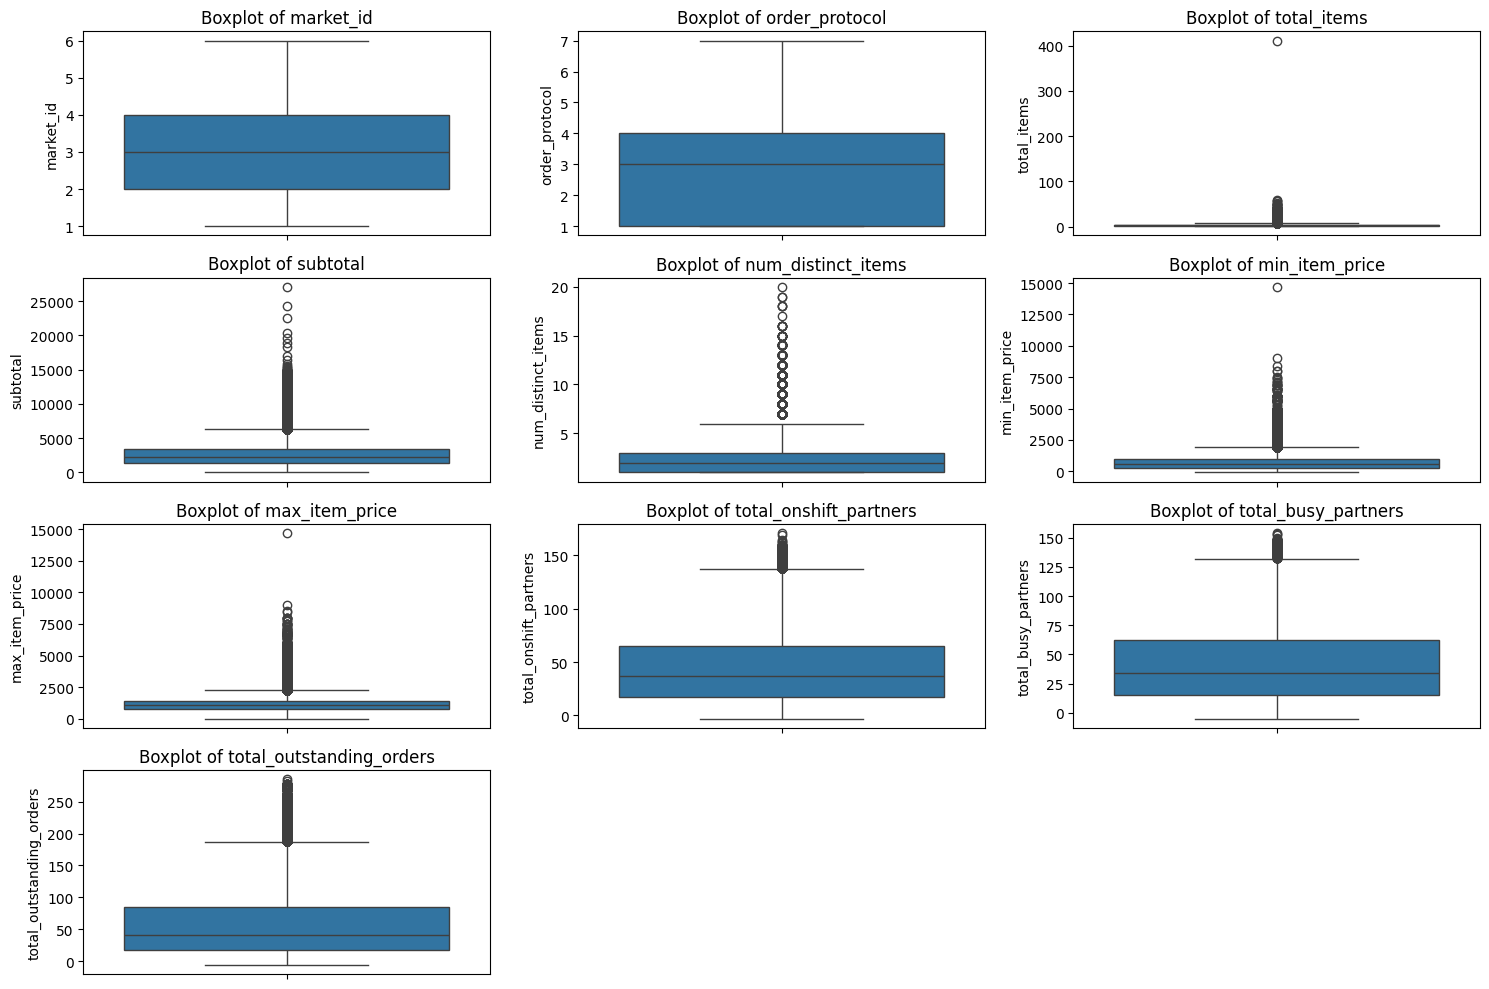

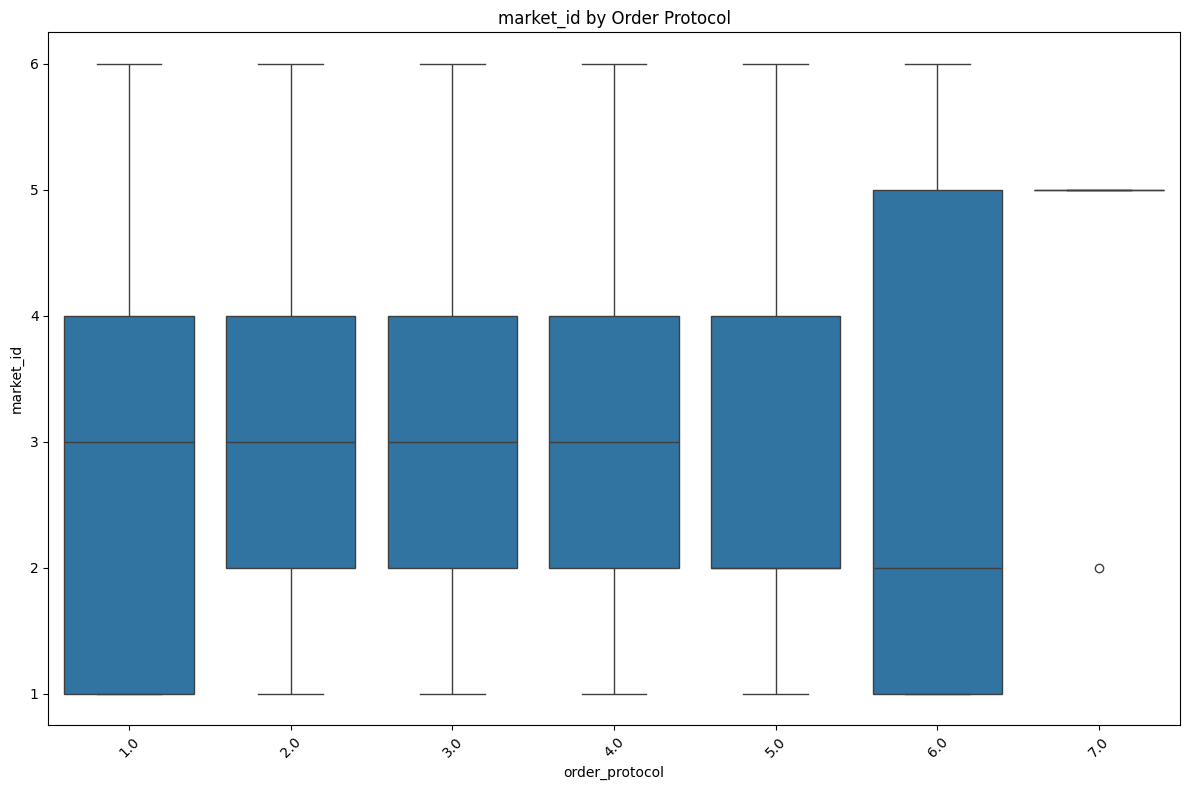

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Create a new subplot for each column
    # Adjust the grid size based on number of columns
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.savefig('boxplots_numerical.png')
plt.show()

if 'order_protocol' in df.columns and len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    # Select first numerical column as an example
    numerical_col = numerical_cols[0]
    sns.boxplot(x='order_protocol', y=numerical_col, data=df)
    plt.title(f'{numerical_col} by Order Protocol')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplot_by_category.png')
    plt.show()

Categorical data visualization

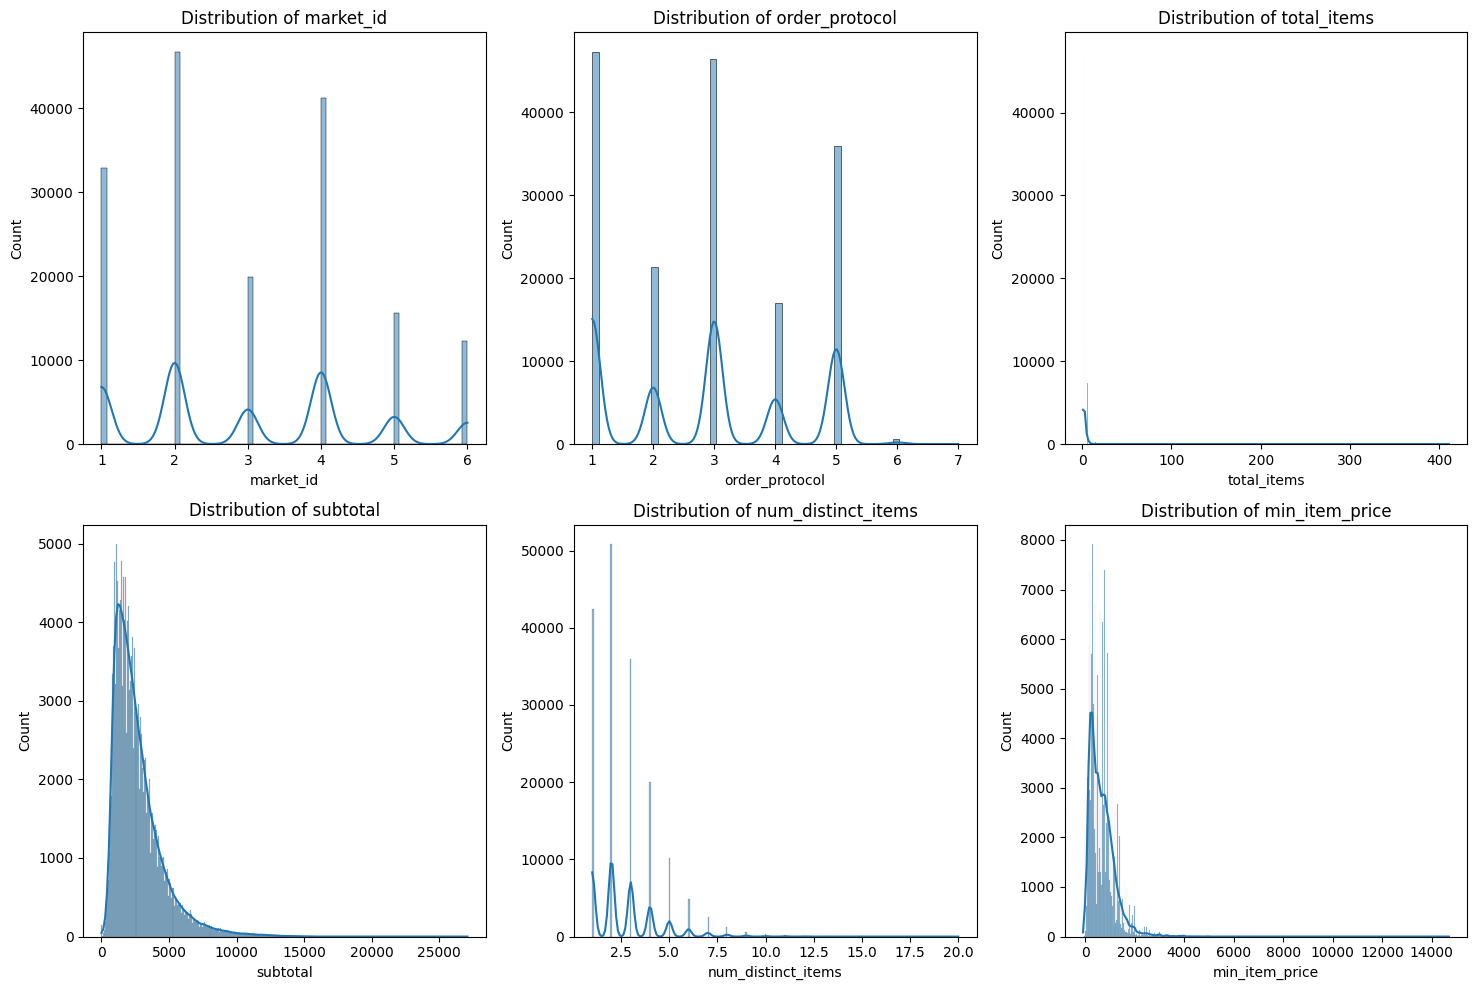

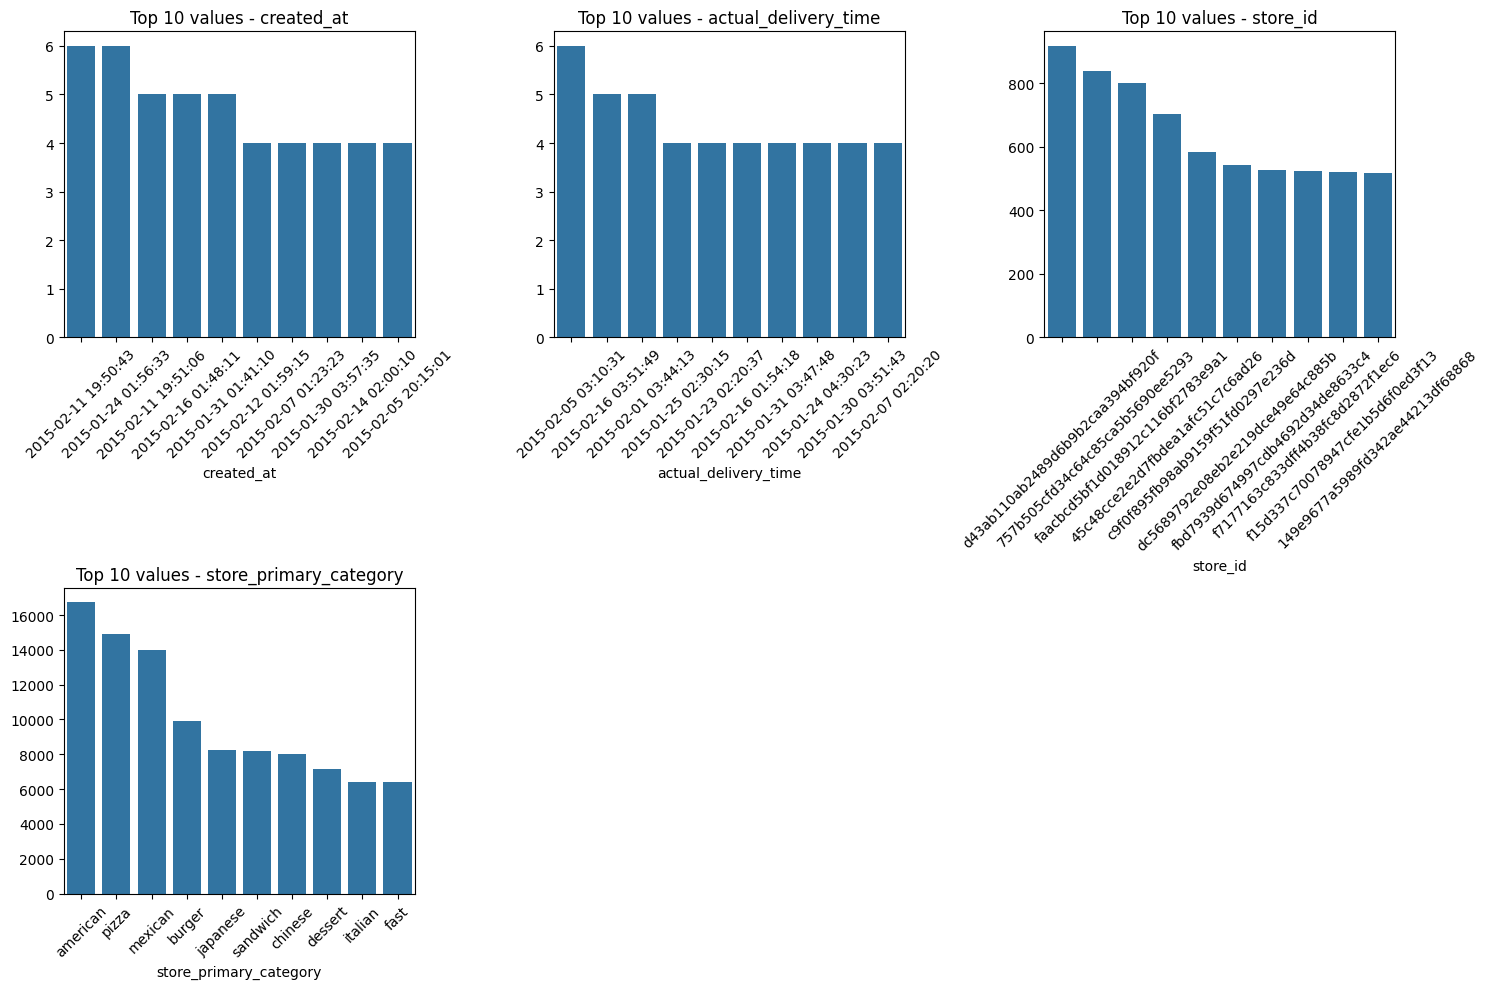

In [ ]:
# First, define numerical_cols before using it
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Now use numerical_cols in your visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:min(6, len(numerical_cols))], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

# Visualize categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols[:min(6, len(categorical_cols))], 1):
        plt.subplot(2, 3, i)
        top_categories = df[col].value_counts().head(10)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top 10 values - {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('categorical_distributions.png')
    plt.show()


# **III. Data Preparation**


## III.1. Data Cleaning

Data cleaning involves preparing the dataset for analysis by addressing issues that could affect results. This includes:
- Duplicate removal: Eliminating repeated rows to ensure data integrity.
- Outlier detection and removal: Identifying and handling extreme values that may distort analysis.
- Missing value imputation: Filling or handling missing values to maintain data completeness and accuracy.

### A - Duplicate Removal

In [ ]:
df.drop_duplicates(inplace=True)
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### B - Outlier Detection and Removal

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

#  en boucle pour plusieurs colonnes :
cols = ["subtotal", "total_items", "num_distinct_items", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders",
        "min_item_price", "max_item_price","order_protocol"]

for col in cols:
    df = remove_outliers_iqr(df, col)


Visualisation des colonnes numériques avec boxplots

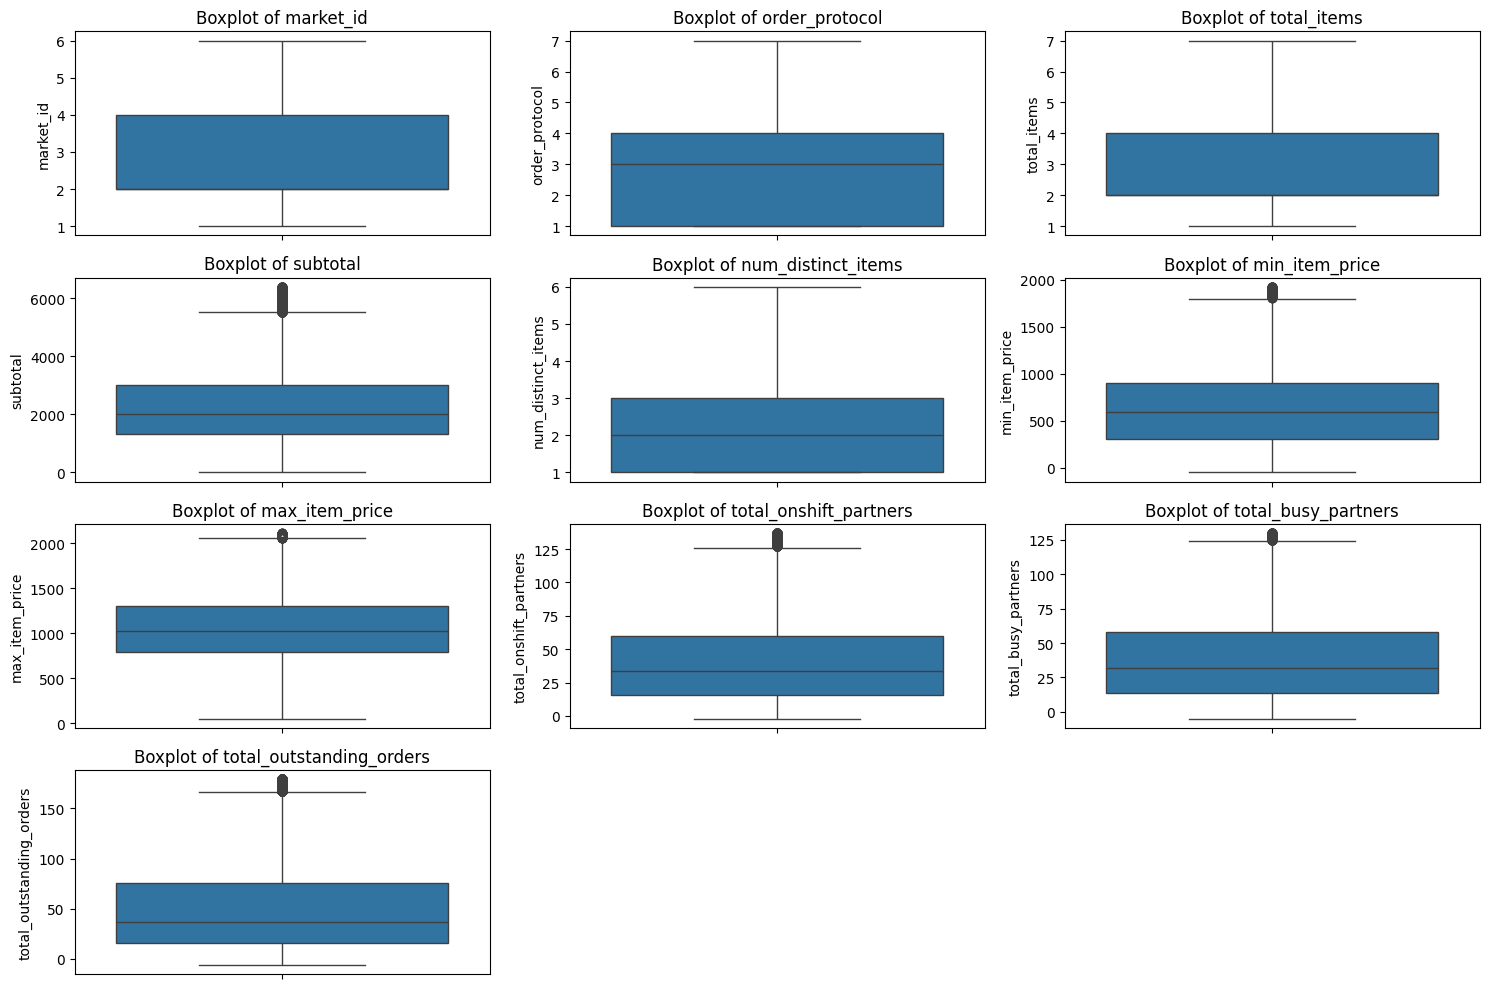

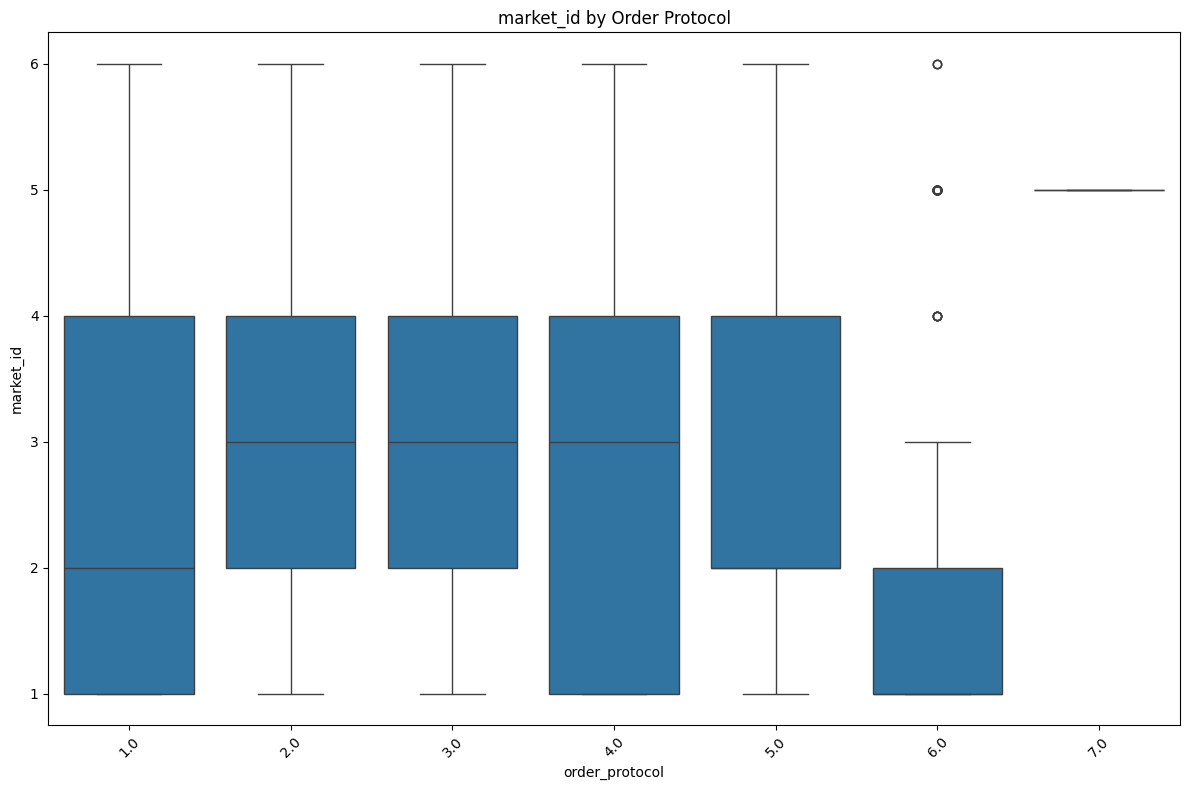

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Create a new subplot for each column
    # Adjust the grid size based on number of columns
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.savefig('boxplots_numerical2.png')
plt.show()

if 'order_protocol' in df.columns and len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    # Select first numerical column as an example
    numerical_col = numerical_cols[0]
    sns.boxplot(x='order_protocol', y=numerical_col, data=df)
    plt.title(f'{numerical_col} by Order Protocol')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplot_by_category2.png')
    plt.show()

### C - Missing Value Imputation

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

print("\n=== Handling Missing Values ===")

# --- 1. Convert datetime columns ---
datetime_cols = ['created_at', 'actual_delivery_time']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# --- 2. Handle categorical-like columns ---
categorical_cols = ['store_primary_category', 'market_id', 'store_id']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')  # fill missing IDs and categories with 'Unknown'

# Handle order_protocol (numeric but categorical)
if 'order_protocol' in df.columns:
    df['order_protocol'] = df['order_protocol'].astype('Int64').astype(str)
    df['order_protocol'] = df['order_protocol'].replace('<NA>', 'Unknown')

# --- 3. Handle price-related missing values ---
price_cols = ['subtotal', 'min_item_price', 'max_item_price']
for col in price_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 4. Handle operational columns ---
operational_cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for col in operational_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 5. Handle item count columns ---
item_cols = ['total_items', 'num_distinct_items']
for col in item_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 6. Handle datetime missing values
df['created_at'] = df['created_at'].fillna(df['created_at'].median())
df['actual_delivery_time'] = df['actual_delivery_time'].fillna(df['actual_delivery_time'].median())

print("Missing values after imputation:")
print(df.isnull().sum())



=== Handling Missing Values ===
Missing values after imputation:
market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


In [ ]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


## III.2. Feature Selection

### (1): Feature Engineering - Time Features

In [ ]:
def create_time_features(df):
        print("\n=== Creating Time Features ===")

        df_time = df.copy()

        if 'created_at' in df_time.columns:
            # Basic time components
            df_time['order_hour'] = df_time['created_at'].dt.hour
            df_time['order_day_of_week'] = df_time['created_at'].dt.dayofweek
            df_time['order_month'] = df_time['created_at'].dt.month
            df_time['order_day_of_month'] = df_time['created_at'].dt.day

            # Time period categories
            df_time['time_period'] = pd.cut(df_time['order_hour'],
                                          bins=[0, 6, 11, 14, 18, 21, 24],
                                          labels=['Late Night', 'Morning', 'Lunch', 'Afternoon', 'Dinner', 'Evening'],
                                          include_lowest=True)

            # Weekend indicator
            df_time['is_weekend'] = (df_time['order_day_of_week'] >= 5).astype(int)

            # Peak hours
            df_time['is_lunch_peak'] = ((df_time['order_hour'] >= 11) & (df_time['order_hour'] <= 14)).astype(int)
            df_time['is_dinner_peak'] = ((df_time['order_hour'] >= 18) & (df_time['order_hour'] <= 21)).astype(int)

        # Calculate delivery duration
        if 'created_at' in df_time.columns and 'actual_delivery_time' in df_time.columns:
            df_time['delivery_duration_minutes'] = (
                df_time['actual_delivery_time'] - df_time['created_at']
            ).dt.total_seconds() / 60

            # Delivery speed categories
            df_time['delivery_speed'] = pd.cut(df_time['delivery_duration_minutes'],
                                             bins=[0, 30, 60, 90, float('inf')],
                                             labels=['Fast', 'Normal', 'Slow', 'Very Slow'],
                                          include_lowest=True)

        return df_time

df_time = create_time_features(df)

df_time.columns


=== Creating Time Features ===


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed'],
      dtype='object')

In [ ]:
df_time['delivery_duration_minutes'].isnull().sum()

np.int64(0)

In [ ]:
df_time['delivery_speed'].isnull().sum()

np.int64(2082)

In [ ]:
df_time.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,order_hour,order_day_of_week,order_month,order_day_of_month,time_period,is_weekend,is_lunch_peak,is_dinner_peak,delivery_duration_minutes,delivery_speed
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,21,1,2,10,Dinner,0,0,1,67.066667,Slow
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,20,3,1,22,Dinner,0,0,1,29.683333,Fast
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,20,2,1,28,Dinner,0,0,1,38.333333,Normal
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,3,3,2,12,Late Night,0,0,0,32.750000,Normal
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,1,2,2,18,Late Night,0,0,0,53.200000,Normal


In [ ]:
df_time['order_hour'].unique()

array([21, 20,  3,  1, 19,  0,  2, 23, 18,  5,  4, 22,  6, 17, 16, 15, 14,
        7,  8], dtype=int32)

In [ ]:
df_time['order_hour'].isnull().sum()

np.int64(0)

In [ ]:
df_time['time_period'].isnull().sum()

np.int64(0)

In [ ]:
# How many nulls in order_hour originally?
print('order_hour nulls:', df_time['order_hour'].isnull().sum())

# Which order_hour values correspond to null time_period after cutting?
nulls = df_time[df_time['time_period'].isnull()]['order_hour']
print(nulls.value_counts(dropna=False).head(20))

# Show a few rows
df_time[df_time['time_period'].isnull()].head()


order_hour nulls: 0
Series([], Name: count, dtype: int64)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,order_hour,order_day_of_week,order_month,order_day_of_month,time_period,is_weekend,is_lunch_peak,is_dinner_peak,delivery_duration_minutes,delivery_speed


In [ ]:
df_time['time_period']

,time_period
1,Dinner
2,Dinner
5,Dinner
7,Late Night
9,Late Night
...,...
172830,Late Night
172831,Late Night
172832,Late Night
172833,Dinner


In [ ]:
df_time.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,order_hour,order_day_of_week,order_month,order_day_of_month,time_period,is_weekend,is_lunch_peak,is_dinner_peak,delivery_duration_minutes,delivery_speed
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,21,1,2,10,Dinner,0,0,1,67.066667,Slow


### (2): Order-related Features

In [ ]:
import numpy as np
def create_order_features(df):
        print("\n=== Creating Order Features ===")

        df_orders = df_time.copy()

        # Price-based features
        if 'subtotal' in df_orders.columns and 'total_items' in df_orders.columns:
            # Avoid division by zero
            df_orders['avg_item_price'] = df_orders['subtotal'] / df_orders['total_items'].replace(0, np.nan)

        if 'subtotal' in df_orders.columns and 'num_distinct_items' in df_orders.columns:
            df_orders['price_per_distinct_item'] = df_orders['subtotal'] / df_orders['num_distinct_items'].replace(0, np.nan)

        if 'num_distinct_items' in df_orders.columns and 'total_items' in df_orders.columns:
            df_orders['item_diversity_ratio'] = df_orders['num_distinct_items'] / df_orders['total_items'].replace(0, np.nan)

        # Price range
        if 'max_item_price' in df_orders.columns and 'min_item_price' in df_orders.columns:
            df_orders['price_range'] = df_orders['max_item_price'] - df_orders['min_item_price']

        # Order size categories
        if 'total_items' in df_orders.columns:
            df_orders['order_size_category'] = pd.cut(df_orders['total_items'],
                                                    bins=[0, 2, 5, 10, float('inf')],
                                                    labels=['Small', 'Medium', 'Large', 'Extra Large'])

        # Order value categories (subtotal is float64)
        if 'subtotal' in df_orders.columns:
            # Use percentiles for more balanced categories
            subtotal_25 = df_orders['subtotal'].quantile(0.25)
            subtotal_50 = df_orders['subtotal'].quantile(0.50)
            subtotal_75 = df_orders['subtotal'].quantile(0.75)

            df_orders['order_value_category'] = pd.cut(df_orders['subtotal'],
                                                     bins=[0, subtotal_25, subtotal_50, subtotal_75, float('inf')],
                                                     labels=['Low', 'Medium', 'High', 'Premium'],include_lowest=True)



        return df_orders
df_orders = create_order_features(df_time)
df_orders.columns




=== Creating Order Features ===


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category'],
      dtype='object')

In [ ]:
df_orders['order_value_category'].isnull().sum()

np.int64(0)

Sélection des catégories principales (Top-K)

In [ ]:
df_orders.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,is_lunch_peak,is_dinner_peak,delivery_duration_minutes,delivery_speed,avg_item_price,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,0,1,67.066667,Slow,1900.000000,1900.000000,1.0,0.0,Small,Medium
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,0,1,29.683333,Fast,1900.000000,1900.000000,1.0,0.0,Small,Medium
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,0,1,38.333333,Normal,1666.666667,1666.666667,1.0,400.0,Medium,Premium
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,0,0,32.750000,Normal,1212.500000,1212.500000,1.0,1050.0,Medium,Premium
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,0,0,53.200000,Normal,1050.000000,1050.000000,1.0,500.0,Small,High
10,3.0,2015-02-02 19:22:53,2015-02-02 20:09:19,f0ade77b43923b38237db569b016ba25,Unknown,4,4.0,4300.0,4.0,1200.0,...,0,1,46.433333,Normal,1075.000000,1075.000000,1.0,300.0,Medium,Premium
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1,1.0,1525.0,1.0,1525.0,...,0,0,37.883333,Normal,1525.000000,1525.000000,1.0,0.0,Small,Medium
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4475.0,3.0,925.0,...,0,0,87.783333,Slow,1491.666667,1491.666667,1.0,900.0,Medium,Premium
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4375.0,3.0,1325.0,...,0,0,82.933333,Slow,1458.333333,1458.333333,1.0,300.0,Medium,Premium
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,ce016f59ecc2366a43e1c96a4774d167,mexican,1,2.0,950.0,2.0,150.0,...,0,0,50.316667,Normal,475.000000,475.000000,1.0,550.0,Small,Low


In [ ]:
# Count only rows where the category is 'Unknown'
unknown_count = (df_orders['store_primary_category'] == 'Unknown').sum()

# Percentage of 'Unknown'
unknown_percentage = (unknown_count / len(df_orders)) * 100

print("Unknown count:", unknown_count)
print("Unknown percentage:", unknown_percentage)


Unknown count: 4393
Unknown percentage: 3.9564814064287197


In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


Ratios & niveaux d'activité magasin

In [ ]:
df_orders['congestion_ratio'] = df_orders['total_busy_partners'] / (df_orders['total_onshift_partners'] + 1e-6)
df_orders['saturation_ratio'] = df_orders['total_outstanding_orders'] / (df_orders['total_onshift_partners'] + 1e-6)


In [ ]:
df_orders.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,delivery_duration_minutes,delivery_speed,avg_item_price,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category,congestion_ratio,saturation_ratio
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,67.066667,Slow,1900.000000,1900.000000,1.0,0.0,Small,Medium,1.999998,1.999998
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,29.683333,Fast,1900.000000,1900.000000,1.0,0.0,Small,Medium,0.000000,0.000000
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,38.333333,Normal,1666.666667,1666.666667,1.0,400.0,Medium,Premium,1.000000,1.000000
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,32.750000,Normal,1212.500000,1212.500000,1.0,1050.0,Medium,Premium,1.142857,1.000000
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,53.200000,Normal,1050.000000,1050.000000,1.0,500.0,Small,High,1.000000,1.000000


In [ ]:
# Drop existing columns if they exist to avoid the error on re-running the cell
if 'store_order_count' in df_orders.columns:
    df_orders = df_orders.drop('store_order_count', axis=1)
if 'store_activity_level' in df_orders.columns:
    df_orders = df_orders.drop('store_activity_level', axis=1)

store_order_counts = df_orders.groupby('store_id').size().rename('store_order_count')
df_orders = df_orders.join(store_order_counts, on='store_id')

# Optional: store activity level
df_orders['store_activity_level'] = pd.cut(df_orders['store_order_count'],
                                    bins=[0, 50, 200, float('inf')],
                                    labels=['low', 'medium', 'high'])



In [ ]:
df_orders.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,avg_item_price,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category,congestion_ratio,saturation_ratio,store_order_count,store_activity_level
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,1900.000000,1900.000000,1.0,0.0,Small,Medium,1.999998,1.999998,6,low
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,1900.000000,1900.000000,1.0,0.0,Small,Medium,0.000000,0.000000,6,low
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,1666.666667,1666.666667,1.0,400.0,Medium,Premium,1.000000,1.000000,6,low
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,1212.500000,1212.500000,1.0,1050.0,Medium,Premium,1.142857,1.000000,6,low
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,1050.000000,1050.000000,1.0,500.0,Small,High,1.000000,1.000000,6,low
10,3.0,2015-02-02 19:22:53,2015-02-02 20:09:19,f0ade77b43923b38237db569b016ba25,Unknown,4,4.0,4300.0,4.0,1200.0,...,1075.000000,1075.000000,1.0,300.0,Medium,Premium,0.999999,0.999999,6,low
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1,1.0,1525.0,1.0,1525.0,...,1525.000000,1525.000000,1.0,0.0,Small,Medium,1.200000,1.600000,3,low
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4475.0,3.0,925.0,...,1491.666667,1491.666667,1.0,900.0,Medium,Premium,0.250000,0.250000,3,low
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4375.0,3.0,1325.0,...,1458.333333,1458.333333,1.0,300.0,Medium,Premium,0.666667,0.500000,3,low
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,ce016f59ecc2366a43e1c96a4774d167,mexican,1,2.0,950.0,2.0,150.0,...,475.000000,475.000000,1.0,550.0,Small,Low,1.000000,1.083333,2,low



### A. Categorical Features
#### (1): Ordinal Encoding (dicuss)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = [
    'store_primary_category',
    'order_protocol',
    'delivery_speed',#
    'order_size_category',
    'order_value_category',
    'store_activity_level',#
    'time_period'
]

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df_orders[categorical_cols])

# Add encoded columns with new names
for i, col in enumerate(categorical_cols):
    df_orders[col + '_encoded'] = encoded_data[:, i]


In [ ]:
df_orders.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
df_orders.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,saturation_ratio,store_order_count,store_activity_level,store_primary_category_encoded,order_protocol_encoded,delivery_speed_encoded,order_size_category_encoded,order_value_category_encoded,store_activity_level_encoded,time_period_encoded
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,1.999998,6,low,46.0,1.0,2.0,2.0,2.0,1.0,1.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,0.000000,6,low,0.0,0.0,0.0,2.0,2.0,1.0,1.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,1.000000,6,low,0.0,0.0,1.0,1.0,3.0,1.0,1.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,1.000000,6,low,0.0,0.0,1.0,1.0,3.0,1.0,3.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,1.000000,6,low,0.0,0.0,1.0,2.0,0.0,1.0,3.0


In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


Création d'indicateurs de performance du magasin et des partenaires

In [ ]:
df_orders['store_avg_delivery_duration'] = df_orders.groupby('store_id')['delivery_duration_minutes'].transform('mean')

In [ ]:
df_orders['idle_partner_ratio'] = (
    (df_orders['total_onshift_partners'] - df_orders['total_busy_partners']) /
    (df_orders['total_onshift_partners'] + 1e-6)
)

In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


### (4): External Data Integration

#### Weather Features Integration

In [ ]:
import pandas as pd
import requests

# --- Copy orders dataset ---
df_weather = df_orders.copy()

# Ensure 'created_at' is datetime
df_weather['created_at'] = pd.to_datetime(df_weather['created_at'])

# Extract time only (HH:MM:SS) from created_at
df_weather['time'] = df_weather['created_at'].dt.time

# Check result
print(df_weather[['created_at', 'time']].head())


# --- Extract order date for daily weather ---
df_weather['order_date'] = df_weather['created_at'].dt.floor('d')  # datetime64[ns]

# --- Open-Meteo API parameters for New Delhi (daily) ---
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 28.6139,
    "longitude": 77.2090,
    "start_date": df_weather["order_date"].min().strftime("%Y-%m-%d"),
    "end_date": df_weather["order_date"].max().strftime("%Y-%m-%d"),
    "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
    "timezone": "Asia/Kolkata"
}

# --- Fetch weather data ---
response = requests.get(url, params=params)
weather_data = response.json()

if 'daily' in weather_data:
    # Convert weather data to DataFrame
    weather_df = pd.DataFrame(weather_data["daily"])
    weather_df["time"] = pd.to_datetime(weather_df["time"])  # datetime64[ns]

    # Rename weather columns for clarity
    weather_df = weather_df.rename(columns={
        "temperature_2m_max": "weather_temp_max",
        "temperature_2m_min": "weather_temp_min",
        "precipitation_sum": "weather_precipitation"
    })

    # --- Merge orders with daily weather ---
    df_weather = df_weather.merge(weather_df, left_on="order_date", right_on="time", how="left")

    # Optionally, drop the duplicate 'time' column from weather API
    df_weather = df_weather.drop(columns=["time_y"])
    df_weather = df_weather.rename(columns={"time_x": "time"})

    print("Daily weather merged successfully!")

else:
    print(f"Error fetching weather data: {weather_data.get('reason', 'Unknown error')}")

# --- Check result ---
print(df_weather[['created_at', 'time', 'order_date', 'weather_temp_max', 'weather_temp_min', 'weather_precipitation']].head())


           created_at      time
1 2015-02-10 21:49:25  21:49:25
2 2015-01-22 20:39:28  20:39:28
5 2015-01-28 20:30:38  20:30:38
7 2015-02-12 03:03:35  03:03:35
9 2015-02-18 01:15:45  01:15:45
Daily weather merged successfully!
           created_at      time order_date  weather_temp_max  \
0 2015-02-10 21:49:25  21:49:25 2015-02-10              22.1   
1 2015-01-22 20:39:28  20:39:28 2015-01-22              15.6   
2 2015-01-28 20:30:38  20:30:38 2015-01-28              17.2   
3 2015-02-12 03:03:35  03:03:35 2015-02-12              22.1   
4 2015-02-18 01:15:45  01:15:45 2015-02-18              26.1   

   weather_temp_min  weather_precipitation  
0               9.5                    0.0  
1              11.2                   17.0  
2               6.9                    0.0  
3               8.6                    0.0  
4              15.6                   12.0  


In [ ]:
df_weather.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,order_value_category_encoded,store_activity_level_encoded,time_period_encoded,store_avg_delivery_duration,idle_partner_ratio,time,order_date,weather_temp_max,weather_temp_min,weather_precipitation
0,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,2.0,1.0,1.0,44.577778,-0.999999,21:49:25,2015-02-10,22.1,9.5,0.0
1,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,2.0,1.0,1.0,44.577778,0.999999,20:39:28,2015-01-22,15.6,11.2,17.0
2,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,3.0,1.0,1.0,44.577778,0.000000,20:30:38,2015-01-28,17.2,6.9,0.0
3,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,3.0,1.0,3.0,44.577778,-0.142857,03:03:35,2015-02-12,22.1,8.6,0.0
4,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,0.0,1.0,3.0,44.577778,0.000000,01:15:45,2015-02-18,26.1,15.6,12.0


In [ ]:
df_weather.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category', 'congestion_ratio', 'saturation_ratio',
       'store_order_count', 'store_activity_level',
       'store_primary_category_encoded', 'order_protocol_encoded',
       'delivery_speed_encoded', 'order_size_category_encoded',
       'order_value_category_encoded', 'store_activity_level_encoded',
       'time_period_encoded', 'store_avg_delivery_dur

### (5): Traffic Pattern Analysis

In [ ]:
def traffic_index(order_hour, order_day_of_week):
    # Weekdays
    if order_day_of_week < 5:  # Monday–Friday
        if 7 <= order_hour <= 9 or 16 <= order_hour <= 19:
            return 3  # heavy traffic
        elif 10 <= order_hour <= 15:
            return 2  # moderate traffic
        else:
            return 1  # light traffic
    # Weekends
    else:  # Saturday-Sunday
        if 12 <= order_hour <= 14:
            return 2  # moderate (shopping lunch time)
        else:
            return 1  # light


Application et transformation

In [ ]:
df_weather['traffic_score'] = df_weather.apply(
    lambda row: traffic_index(row['order_hour'], row['order_day_of_week']),
    axis=1
)


In [ ]:
df_weather[['created_at', 'order_hour', 'order_day_of_week', 'traffic_score']].head(10)

,created_at,order_hour,order_day_of_week,traffic_score
0,2015-02-10 21:49:25,21,1,1
1,2015-01-22 20:39:28,20,3,1
2,2015-01-28 20:30:38,20,2,1
3,2015-02-12 03:03:35,3,3,1
4,2015-02-18 01:15:45,1,2,1
5,2015-02-02 19:22:53,19,0,3
6,2015-02-12 03:36:46,3,3,1
7,2015-02-06 00:42:42,0,4,1
8,2015-02-08 02:04:17,2,6,1
9,2015-01-31 02:21:23,2,5,1


In [ ]:
df_weather['traffic_category'] = df_weather['traffic_score'].map({1:'light',2:'moderate',3:'heavy'})

In [ ]:
df_weather[['created_at', 'order_hour', 'order_day_of_week', 'traffic_score', 'traffic_category']].head(10)

,created_at,order_hour,order_day_of_week,traffic_score,traffic_category
0,2015-02-10 21:49:25,21,1,1,light
1,2015-01-22 20:39:28,20,3,1,light
2,2015-01-28 20:30:38,20,2,1,light
3,2015-02-12 03:03:35,3,3,1,light
4,2015-02-18 01:15:45,1,2,1,light
5,2015-02-02 19:22:53,19,0,3,heavy
6,2015-02-12 03:36:46,3,3,1,light
7,2015-02-06 00:42:42,0,4,1,light
8,2015-02-08 02:04:17,2,6,1,light
9,2015-01-31 02:21:23,2,5,1,light


## III.3. Data Transformation

### B. Feature Scaling

#### Standardization (Standard Scaler)

Standard Scaler is used to normalize numerical features by removing the mean and scaling to unit variance.

##### **⚠️ modeling_df is for the first BO**

In [ ]:
selected_cols = [
    "total_items", "order_hour", "order_day_of_week", "order_month",
    "order_day_of_month", "is_weekend", "is_lunch_peak", "is_dinner_peak",
    "avg_item_price", "price_per_distinct_item", "item_diversity_ratio",
    "saturation_ratio", "store_primary_category_encoded",
    "order_protocol_encoded", "store_activity_level_encoded",
    "time_period_encoded", "store_avg_delivery_duration",
    "weather_temp_max", "weather_temp_min", "weather_precipitation",
    "traffic_score", "subtotal", "num_distinct_items"
]
df_dso1 = df_weather[selected_cols].copy()

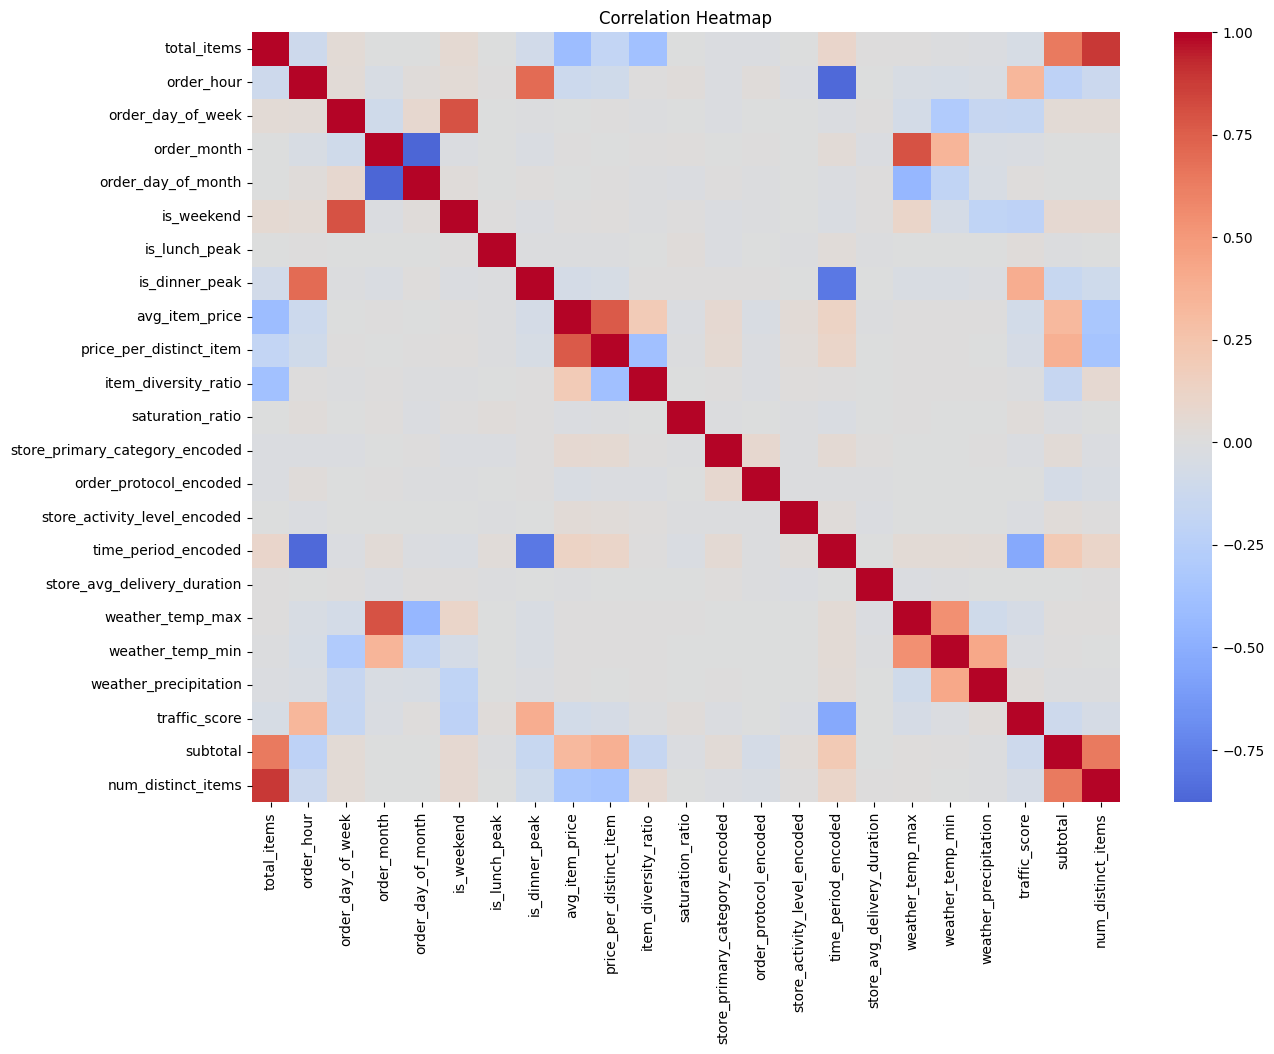

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_dso1.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


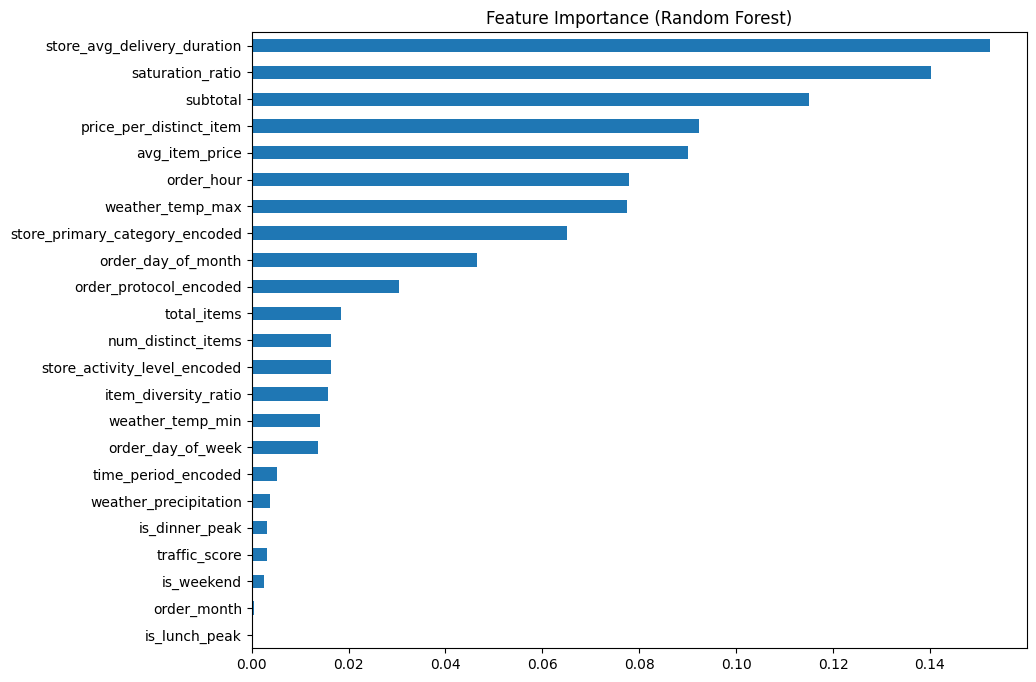

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Suppose que ta target est "delivery_duration_minutes"
X = df_dso1
y = df_weather["delivery_duration_minutes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot.barh(figsize=(10,8))
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
selected_cols = [
    # Features avec forte importance et faible corrélation
    "store_avg_delivery_duration",  # Importance très élevée
    "saturation_ratio",             # Importance élevée
    "subtotal",                     # Importance élevée
    "avg_item_price",              # Importance modérée
    "order_hour",                  # Importance modérée
    "weather_temp_max",            # Importance modérée
    "store_primary_category_encoded", # Importance modérée
    "order_day_of_month",          # Importance faible mais peut être utile
    "total_items",

    "total_outstanding_orders",
    "congestion_ratio"
]

target_col = "delivery_duration_minutes"
assert target_col in df_weather.columns, f"{target_col} absent de df_weather"

#(split temporel)
time_col = None
for t in ("created_at", "order_date"):
    if t in df_weather.columns:
        time_col = t
        break
df_weather = df_weather[df_weather['delivery_duration_minutes'] >= 0].copy()

# Add 'store_id' to selected_cols for creating modeling_df
modeling_selected_cols = selected_cols + ['store_id']


# Construire un DataFrame trié si on a le temps
if time_col:
    modeling_df = df_weather[modeling_selected_cols + [target_col, time_col]].dropna(subset=[target_col]).sort_values(time_col).reset_index(drop=True)
else:
    modeling_df = df_weather[modeling_selected_cols + [target_col]].dropna(subset=[target_col]).reset_index(drop=True)

X = modeling_df[selected_cols].copy()
y = modeling_df[target_col].copy()

In [ ]:
correlations = modeling_df[selected_cols + [target_col]].corr()[target_col].sort_values(ascending=False)
print(correlations)

delivery_duration_minutes         1.000000
store_avg_delivery_duration       0.169333
subtotal                          0.002619
total_outstanding_orders          0.002545
store_primary_category_encoded    0.001854
total_items                       0.001652
avg_item_price                    0.001149
saturation_ratio                  0.000670
congestion_ratio                 -0.000591
order_day_of_month               -0.015235
order_hour                       -0.058032
weather_temp_max                 -0.076358
Name: delivery_duration_minutes, dtype: float64


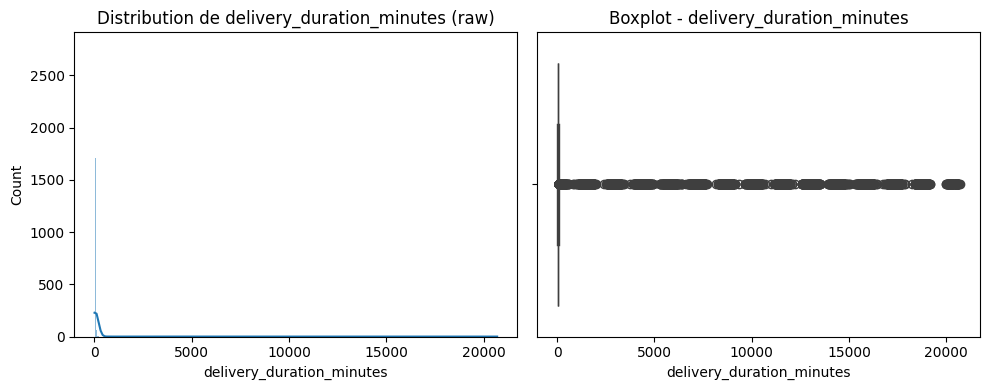

Skewness: 9.077296771393065 Median: 43.416666666666664 Mean: 245.32122008976512


In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(y, kde=True)
plt.title("Distribution de delivery_duration_minutes (raw)")

plt.subplot(1,2,2)
sns.boxplot(x=y)
plt.title("Boxplot - delivery_duration_minutes")
plt.tight_layout()
plt.show()

print("Skewness:", y.skew(), "Median:", y.median(), "Mean:", y.mean())

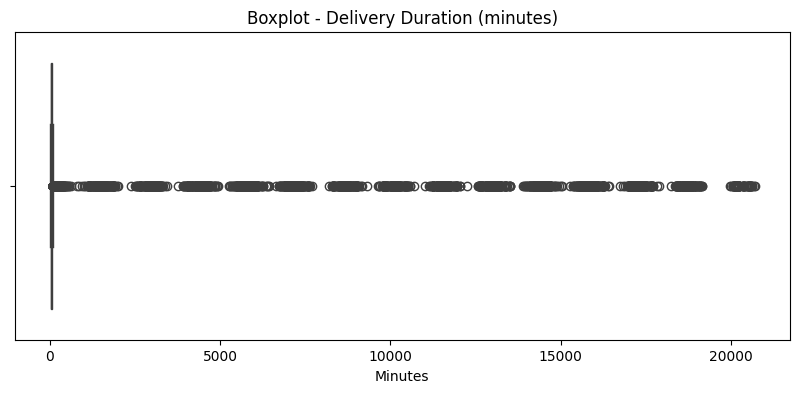

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=modeling_df['delivery_duration_minutes'])
plt.title("Boxplot - Delivery Duration (minutes)")
plt.xlabel("Minutes")
plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

modeling_df = remove_outliers_iqr(modeling_df, 'delivery_duration_minutes')


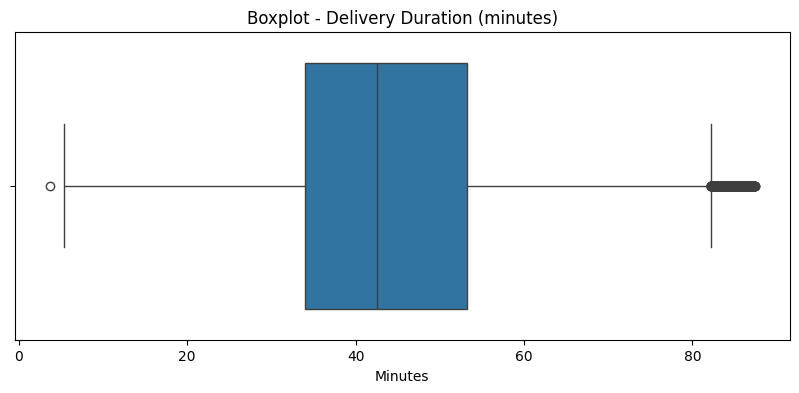

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=modeling_df['delivery_duration_minutes'])
plt.title("Boxplot - Delivery Duration (minutes)")
plt.xlabel("Minutes")
plt.show()

In [ ]:
print(modeling_df["delivery_duration_minutes"].min(), modeling_df["delivery_duration_minutes"].max())


3.716666666666667 87.38333333333334


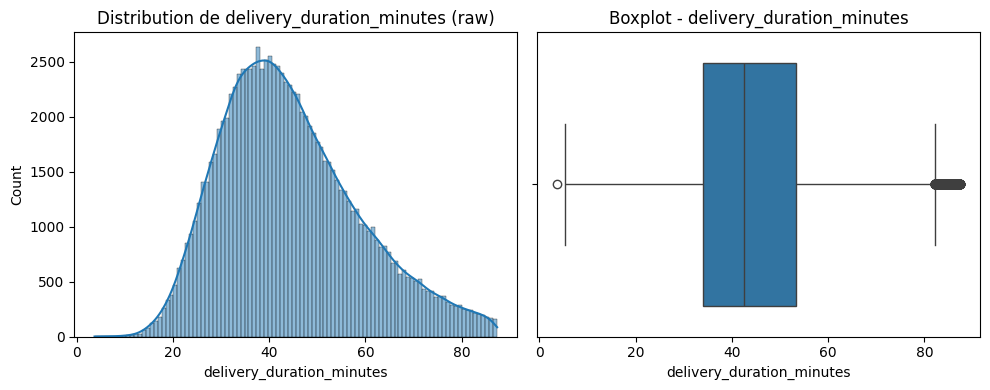

Skewness: 0.5878457932562178


In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(modeling_df["delivery_duration_minutes"], kde=True)
plt.title("Distribution de delivery_duration_minutes (raw)")

plt.subplot(1,2,2)
sns.boxplot(x=modeling_df["delivery_duration_minutes"])
plt.title("Boxplot - delivery_duration_minutes")
plt.tight_layout()
plt.show()

print("Skewness:", modeling_df["delivery_duration_minutes"].skew())

In [ ]:
modeling_df['store_avg_delivery_duration'] =modeling_df.groupby('store_id')['delivery_duration_minutes'].transform('mean')
modeling_df.head()

,store_avg_delivery_duration,saturation_ratio,subtotal,avg_item_price,order_hour,weather_temp_max,store_primary_category_encoded,order_day_of_month,total_items,total_outstanding_orders,congestion_ratio,store_id,delivery_duration_minutes,created_at
0,44.369298,0.500000,1058.0,529.00,15,16.3,24.0,21,2.0,1.0,0.500000,6a639c52538fd7bb3e1186724afbe9b2,55.666667,2015-01-21 15:22:03
1,41.610000,0.500000,690.0,345.00,15,16.3,16.0,21,2.0,1.0,0.000000,12fb63ba1566cb03484e1e5e290a73f4,44.716667,2015-01-21 15:31:51
2,35.941654,0.999999,749.0,749.00,15,16.3,46.0,21,1.0,1.0,0.999999,d43ab110ab2489d6b9b2caa394bf920f,27.683333,2015-01-21 15:54:48
3,40.267532,0.750000,640.0,320.00,16,16.3,16.0,21,2.0,3.0,0.500000,3c333aadfc3ee8ecb8d77ee31197d96a,53.733333,2015-01-21 16:00:44
4,42.368889,0.750000,269.0,67.25,16,16.3,28.0,21,4.0,3.0,0.500000,4b2e12b43338e42361077cb6516ad63e,81.300000,2015-01-21 16:00:46


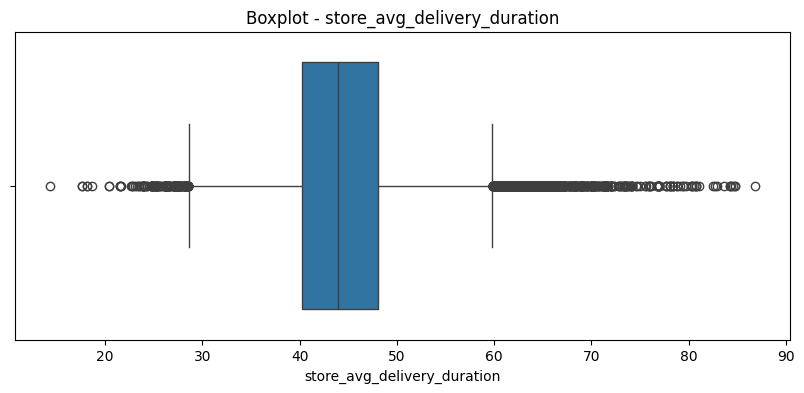

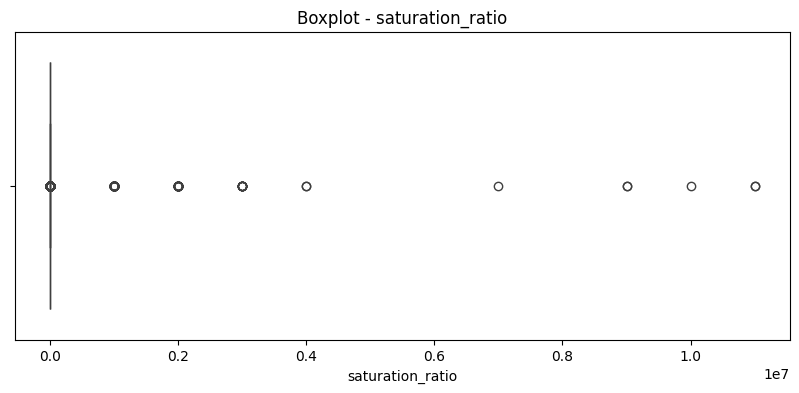

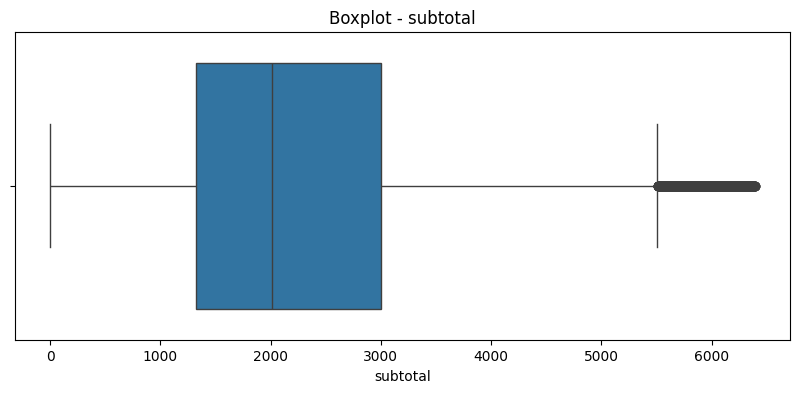

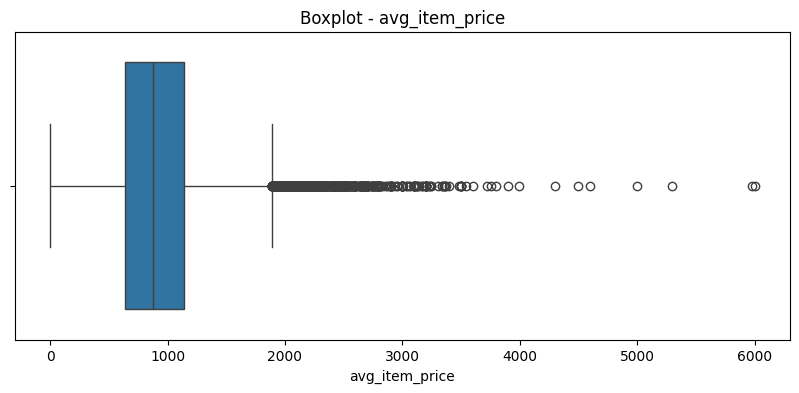

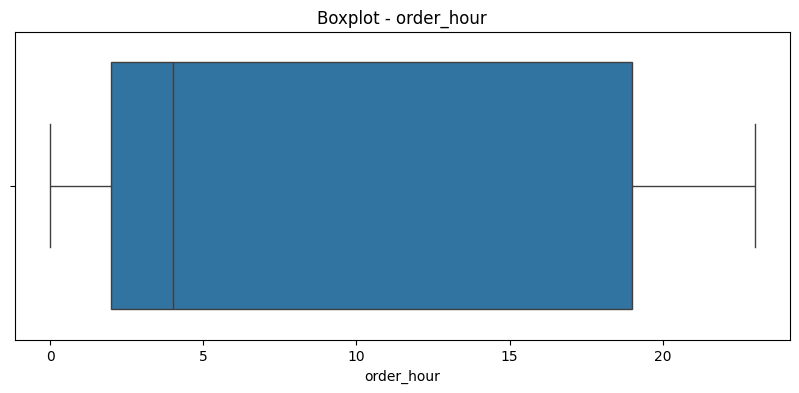

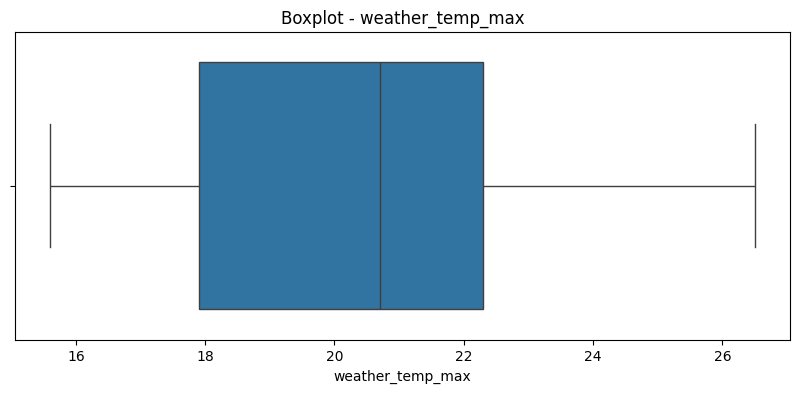

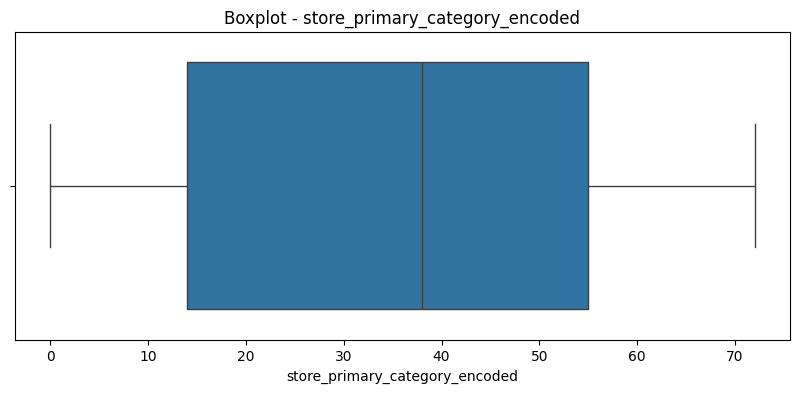

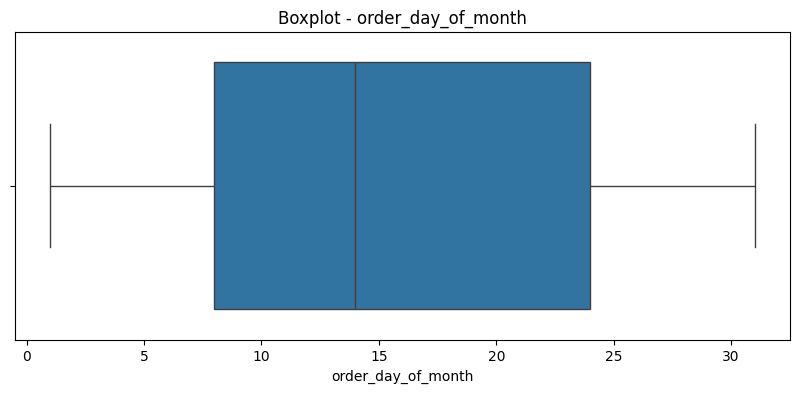

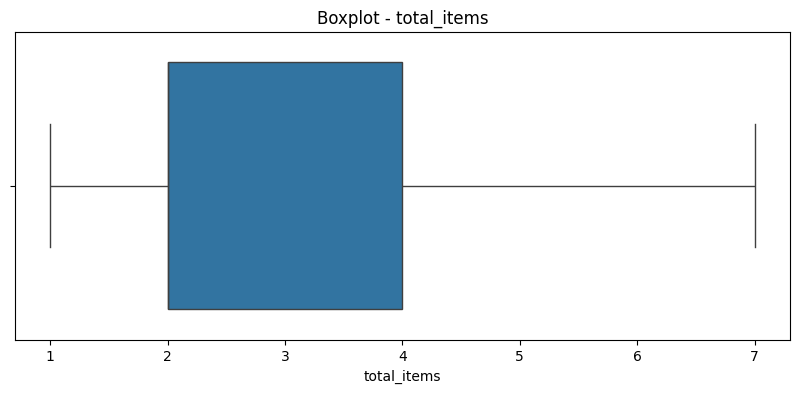

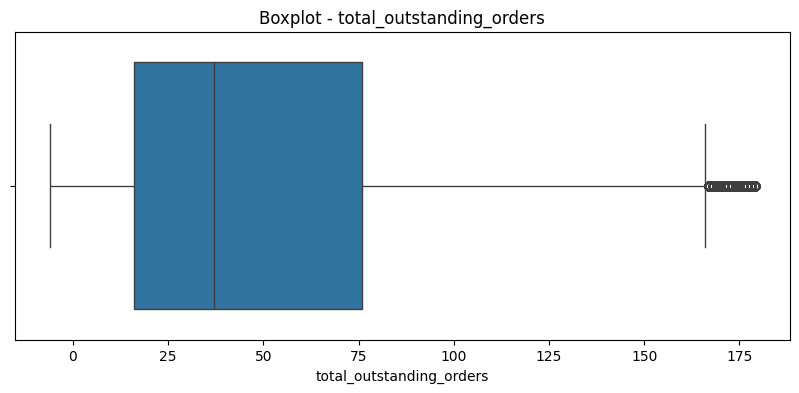

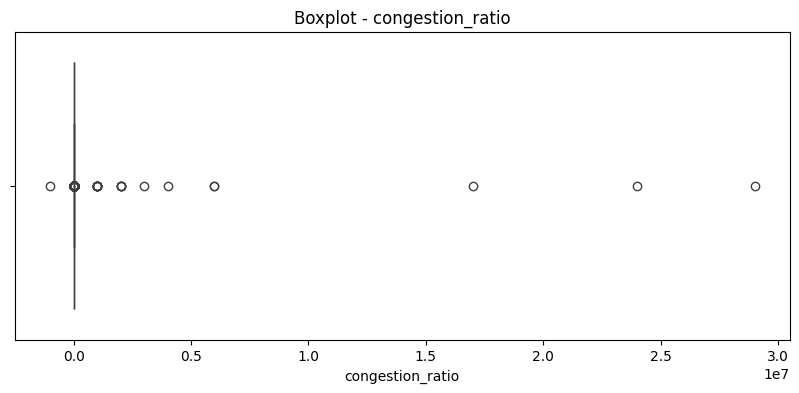

In [ ]:
for col in selected_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=modeling_df[col])
    plt.title(f"Boxplot - {col}")
    plt.xlabel(col)
    plt.show()

In [1]:
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower) & (data[column] <= upper)]
    return data


cols_to_clean = [ "avg_item_price", "saturation_ratio","store_avg_delivery_duration", "weather_precipitation", "traffic_score", "subtotal","total_outstanding_orders","congestion_ratio"]
modeling_df = remove_outliers_iqr(modeling_df, cols_to_clean)



NameError: name 'modeling_df' is not defined

In [ ]:
for col in cols_to_clean:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=modeling_df[col])
    plt.title(f"Boxplot - {col}")
    plt.xlabel(col)
    plt.show()

##### **⚠️ df_behavior_scaled is for the second BO**

In [ ]:
df_orders.columns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import pandas as pd

cols_to_scale = [
    "order_hour","order_day_of_week","time_period_encoded","is_weekend",
    "total_items","num_distinct_items","subtotal","avg_item_price",
    "price_per_distinct_item","item_diversity_ratio","price_range",
    "order_size_category_encoded","order_value_category_encoded",
    "store_primary_category_encoded","store_activity_level_encoded",
    "store_avg_delivery_duration","delivery_duration_minutes",
    "delivery_speed_encoded","idle_partner_ratio",
    "congestion_ratio","saturation_ratio",
    "weather_temp_max","weather_temp_min","weather_precipitation",
    "traffic_score"
]

df_behavior_scaled = df_weather.copy()

# 1) Imputation
imp = SimpleImputer(strategy="median")   # median works better with skewed data
X_imputed = imp.fit_transform(df_behavior_scaled[cols_to_scale])

# 2) Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3) Replace in DataFrame
df_behavior_scaled[cols_to_scale] = X_scaled


In [ ]:
print(df_behavior_scaled.head(1))


## III.4. Dimensionality Reduction

PCA is used to reduce the number of features in a dataset while retaining most of the original variance. By transforming correlated variables into a smaller set of uncorrelated components, PCA simplifies the dataset, speeds up computation, and can help improve model performance while reducing noise.

### Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X : dataframe standardisée (features pour le BO "comportement client")
# Par exemple : X = df_behavior_scaled[features_for_clustering]

# Check for remaining NaNs
print("Missing values before PCA:")
print(X.isnull().sum())

# Drop rows with NaN values for PCA, as imputation might not have covered all cases
X_cleaned = X.dropna()

# Initialisation du PCA
pca = PCA(n_components=3)  # Initialisation du PCA pour 3 composantes

# Application du PCA
X_pca = pca.fit_transform(X_cleaned)

# Vérification des composantes principales
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformation en DataFrame pour visualisation
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Visualisation 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Comportement client (3 composantes)')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suppression des lignes avec NaN
X_cleaned = X.dropna()

# PCA sur 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cleaned)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformation en DataFrame PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# -----------------------------
# 1. Barplot des contributions
# -----------------------------
features = X.columns
loadings = pca.components_.T  # colonnes = PC, lignes = features

fig, axes = plt.subplots(1, 2, figsize=(14,6))

for i in range(2):
    axes[i].barh(features, loadings[:, i])
    axes[i].set_title(f"Contributions des features à PC{i+1}")
    axes[i].set_xlabel("Poids (loading)")

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Biplot (features + données)
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.3)

for i, feature in enumerate(features):
    plt.arrow(0, 0,
              loadings[i,0]*max(df_pca['PC1']),
              loadings[i,1]*max(df_pca['PC2']),
              color='red', alpha=0.5)
    plt.text(loadings[i,0]*max(df_pca['PC1'])*1.1,
             loadings[i,1]*max(df_pca['PC2'])*1.1,
             feature, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot PCA - Données + Features")
plt.grid(True)
plt.show()


In [ ]:
df_weather.columns

In [ ]:
# Show all columns when printing any DataFrame
pd.set_option('display.max_columns', None)

# Now your df.head() will show all columns
print(df_weather.head())

# Supervised learning problem

# Modeling RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# X et y
X = modeling_df[selected_cols]
y = modeling_df['delivery_duration_minutes']

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,      # nombre d'arbres
    max_depth=15,          # profondeur max
    min_samples_split=5,   # nombre min d'échantillons pour splitter
    min_samples_leaf=2,    # nombre min d'échantillons par feuille
    random_state=42,
    n_jobs=-1
)

# Entraînement
rf_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = rf_model.predict(X_test_scaled)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== RÉSULTATS DU MODÈLE ===")
print(f"MAE: {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R²: {r2:.3f}")

# Métriques additionnelles utiles
print(f"\nMoyenne des temps de livraison réels: {y_test.mean():.2f} min")
print(f"Écart-type des temps réels: {y_test.std():.2f} min")
print(f"Erreur relative moyenne: {(mae/y_test.mean())*100:.1f}%")

In [ ]:
# 1. Visualisation des résultats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Temps réel (min)')
plt.ylabel('Temps prédit (min)')
plt.title('Prédictions vs Réalité')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prédictions (min)')
plt.ylabel('Résidus (min)')
plt.title('Analyse des résidus')

plt.tight_layout()
plt.show()

# 2. Importance des features avec le modèle standardisé
feature_importance = pd.DataFrame({
    'feature': selected_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== IMPORTANCE DES FEATURES ===")
print(feature_importance)



#  Modeling RegLin



In [ ]:
X = modeling_df[selected_cols].copy()
y = modeling_df[target_col].copy()

# X.drop('store_id', axis=1, inplace=True) # This line is not needed as store_id is not in selected_cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


In [ ]:
y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R2: {r2:.2f}")


In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Vraie durée (minutes)")
plt.ylabel("Durée prédite (minutes)")
plt.title("Prédictions vs Réel")
plt.show()


# Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Deployment

# Unsupervised learning problem

# Modeling

**Elbow Method**

In [ ]:
print(df_behavior_scaled[cols_to_scale].isna().sum().sum())


In [ ]:
sse = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_behavior_scaled[cols_to_scale])
    sse.append(km.inertia_)

plt.plot(list(K), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.show()


The y-axis (SSE/Inertia) measures how tightly the points are grouped within each cluster. Lower values mean better clustering.

The x-axis is the number of clusters (k) tested from two to ten.

As k increases, SSE decreases because adding more clusters naturally reduces the distance between points and their cluster centers.

Interpretation of the curve:

From two to four clusters, SSE drops steeply, meaning the clustering improves significantly.

After around four or five clusters, the improvement slows down, and the curve starts flattening.

**The best choice for the number of clusters is four**

**Silhouette Score**

In [ ]:
X = df_behavior_scaled[cols_to_scale].to_numpy()
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    # Attention: silhouette_score nécessite au moins 2 labels distincts
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X, labels)
        print(f"Clusters: {k}, Silhouette Score: {score:.3f}")
    else:
        print(f"Clusters: {k}, Silhouette Score: non défini (1 seul label)")

Silhouette score range:

Close to 1 → well-separated, compact clusters.

Around 0 → overlapping clusters.

Negative → misassigned points.

-->All the scores are around 0.11–0.13, which indicates weak structure.

**Best : K=2**

**K-means**

**k=2**

In [ ]:
k = 2
kmeans2 = KMeans(n_clusters=k, random_state=42, n_init=10)
df_behavior_scaled['cluster'] = kmeans2.fit_predict(X)

In [ ]:
cluster_summary = df_behavior_scaled.groupby('cluster')[features].mean()
print(cluster_summary)


In [ ]:
import seaborn as sns

sns.pairplot(df_behavior_scaled, vars=['subtotal','total_items','avg_item_price','delivery_duration_minutes'], hue='cluster')


**K=4**

In [ ]:
  k = 4
  kmeans4 = KMeans(n_clusters=k, random_state=42, n_init=10)
  df_behavior_scaled['cluster'] = kmeans4.fit_predict(X)

In [ ]:
cluster_summary = df_behavior_scaled.groupby('cluster')[features].mean()
print(cluster_summary)


In [ ]:
# Analyze cluster characteristics
cluster_analysis = df_behavior_scaled.groupby('cluster')[cols_to_scale].mean()
display(cluster_analysis)

In [ ]:
import seaborn as sns

# Define a custom palette: one color per cluster
custom_palette = {0: "skyblue", 1: "salmon", 2: "lightgreen", 3: "gold"}

sns.pairplot(
    df_behavior_scaled,
    vars=['subtotal','total_items','avg_item_price','delivery_duration_minutes'],
    hue='cluster',
    palette=custom_palette
)

# Evaluation

**PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the scaled and imputed DataFrame for PCA
X_pca_input = df_behavior_scaled[cols_to_scale].dropna()

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)

df_cleaned_for_pca = df_behavior_scaled[cols_to_scale].dropna().copy()
labels2 = df_behavior_scaled.loc[df_cleaned_for_pca.index, 'cluster']
labels4 = df_behavior_scaled.loc[df_cleaned_for_pca.index, 'cluster']


# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# k=2
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels2, cmap="tab10", s=20)
axes[0].set_title("KMeans Clusters (k=2)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# k=4
# Need to re-run KMeans with k=4 on the cleaned data to get the correct labels for this plot
kmeans4_cleaned = KMeans(n_clusters=4, random_state=42, n_init=10)
labels4_cleaned = kmeans4_cleaned.fit_predict(X_pca_input) # Fit KMeans on the cleaned data for visualization
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels4_cleaned, cmap="tab10", s=20)
axes[1].set_title("KMeans Clusters (k=4)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

NameError: name 'df_behavior_scaled' is not defined

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

for k in [2, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    chi = calinski_harabasz_score(X_scaled, labels)
    print(f"k={k}: DBI={dbi:.3f}, CHI={chi:.1f}")




*   Davies–Bouldin Index (DBI) → lower is better. k=4
*   Calinski–Harabasz Index (CHI) → higher is better. k=2



# Deployment

Monter Drive et créer un dossier de travail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Dossier de travail (modifiable)
!mkdir -p /content/deploy
%cd /content/deploy

Installer des versions compatibles

In [ ]:
!pip install --quiet --no-warn-conflicts \
  "numpy==2.1.3" "scipy==1.13.1" "scikit-learn==1.5.2" \
  "joblib==1.3.2" "pandas==2.2.2" "matplotlib==3.8.4" "streamlit==1.37.0"

import numpy as np, sklearn, scipy, joblib, pandas as pd
print("numpy:", np.__version__)
print("sklearn:", sklearn.__version__)
print("scipy:", scipy.__version__)
print("joblib:", joblib.__version__)
print("pandas:", pd.__version__)

Régénérer proprement les artefacts .pkl

In [ ]:
import pandas as pd, numpy as np, joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

assert 'df_weather' in globals(), "df_weather introuvable (exécute d'abord ton feature engineering)."
assert 'cols_to_scale' in globals(), "cols_to_scale introuvable (définis la liste des features)."

# Préparation des données brutes
X_raw = df_weather[cols_to_scale].copy()
for c in cols_to_scale:
    X_raw[c] = pd.to_numeric(X_raw[c], errors="coerce")

# Imputation -> Scaling -> KMeans
imputer = SimpleImputer(strategy="mean")
X_imp = imputer.fit_transform(X_raw)

scaler = StandardScaler()
X_scl = scaler.fit_transform(X_imp)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scl)

# Sauvegarde artefacts
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(cols_to_scale, "feature_columns.pkl")

print("✅ Artefacts régénérés dans /content/deploy")

Créer les fichiers de l’app Streamlit

In [ ]:
from pathlib import Path

Path("requirements.txt").write_text("""streamlit==1.37.0
pandas==2.2.2
numpy==2.1.3
scipy==1.13.1
scikit-learn==1.5.2
joblib==1.3.2
matplotlib==3.8.4
""", encoding="utf-8")

app_code = r'''import os
import io
import joblib
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

st.set_page_config(page_title="Clustering K-Means - Colab", layout="wide")

@st.cache_resource(show_spinner=True)
def load_artifacts():
    kmeans = joblib.load("kmeans_model.pkl")
    scaler = joblib.load("scaler.pkl")
    imputer = joblib.load("imputer.pkl")
    feature_cols = joblib.load("feature_columns.pkl")
    if not isinstance(feature_cols, (list, tuple, np.ndarray)):
        raise ValueError("feature_columns.pkl doit contenir une liste de colonnes.")
    return kmeans, scaler, imputer, list(feature_cols)

def ensure_feature_alignment(df, feature_cols):
    df = df.copy()
    for c in feature_cols:
        if c not in df.columns:
            df[c] = np.nan
    return df[feature_cols]

def preprocess_for_model(df_raw, feature_cols, imputer, scaler):
    aligned = ensure_feature_alignment(df_raw, feature_cols)
    for c in aligned.columns:
        aligned[c] = pd.to_numeric(aligned[c], errors="coerce")
    X_imp = imputer.transform(aligned)
    X_scl = scaler.transform(X_imp)
    return aligned, X_imp, X_scl

def predict_clusters(df_raw, kmeans, scaler, imputer, feature_cols):
    aligned, X_imp, X_scl = preprocess_for_model(df_raw, feature_cols, imputer, scaler)
    labels = kmeans.predict(X_scl)
    dists = np.linalg.norm(X_scl[:, None, :] - kmeans.cluster_centers_[None, :, :], axis=2)
    return labels, dists, aligned, X_imp, X_scl

def pca_plot(X_scaled, labels, kmeans, title):
    if X_scaled.shape[0] < 2:
        st.info("PCA: besoin d'au moins 2 lignes.")
        return
    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X_scaled)
    C_2d = pca.transform(kmeans.cluster_centers_)
    fig, ax = plt.subplots(figsize=(7,5))
    sc = ax.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap="tab10", s=20, alpha=0.8)
    ax.scatter(C_2d[:,0], C_2d[:,1], c=range(kmeans.n_clusters), cmap="tab10",
               marker="X", s=200, edgecolor="k", label="Centroïdes")
    ax.set_title(title); ax.set_xlabel("PC1"); ax.set_ylabel("PC2")
    lg = ax.legend(*sc.legend_elements(), title="Cluster", loc="best")
    ax.add_artist(lg)
    ax.legend(loc="lower right")
    st.pyplot(fig)

st.title("Déploiement K-Means (Unsupervised) - Google Colab")

try:
    kmeans, scaler, imputer, feature_cols = load_artifacts()
except Exception as e:
    st.error(f"Erreur lors du chargement des artefacts: {e}")
    st.stop()

with st.sidebar:
    import numpy as _np, sklearn as _sk, joblib as _jb
    try:
        import scipy as _sp
        spv = _sp.__version__
    except Exception:
        spv = "non installé"
    st.header("Infos modèle")
    st.write(f"- Clusters: {getattr(kmeans, 'n_clusters', 'N/A')}")
    st.write(f"- Features attendues: {len(feature_cols)}")
    if st.checkbox("Voir les features"):
        st.write(feature_cols)
    st.caption(f"Versions → numpy: {_np.__version__} | sklearn: {_sk.__version__} | scipy: {spv} | joblib: {_jb.__version__}")

mode = st.radio("Mode:", ["Saisie manuelle", "Batch (CSV)"], horizontal=True)

if mode == "Saisie manuelle":
    st.subheader("Entrer les valeurs des features (laisse vide si inconnu)")
    vals = {}
    cols_per_row = 3
    for i, c in enumerate(feature_cols):
        if i % cols_per_row == 0:
            row = st.columns(cols_per_row)
        with row[i % cols_per_row]:
            vals[c] = st.text_input(c, "")
    if st.button("Prédire", type="primary"):
        row_dict = {}
        for k, v in vals.items():
            try:
                row_dict[k] = float(v) if str(v).strip() != "" else np.nan
            except:
                row_dict[k] = np.nan
        df_in = pd.DataFrame([row_dict])
        try:
            labels, dists, aligned, X_imp, X_scl = predict_clusters(df_in, kmeans, scaler, imputer, feature_cols)
            pred = int(labels[0])
            st.success(f"Cluster prédit: {pred}")
            dist_s = pd.Series(dists[0], index=[f"C{i}" for i in range(kmeans.n_clusters)]).sort_values()
            st.bar_chart(dist_s)
            with st.expander("Valeurs imputées (post-imputation)"):
                st.write(pd.DataFrame(X_imp, columns=feature_cols).round(4))
            st.subheader("PCA (votre point + centroïdes)")
            if X_scl.shape[0] == 1:
                X2 = np.vstack([X_scl, X_scl + 1e-6])
                pca_plot(X2, np.array([pred, pred]), kmeans, "PCA - Point (virtuel) vs centroïdes")
            else:
                pca_plot(X_scl, labels, kmeans, "PCA - Vos données & centroïdes")
        except Exception as e:
            st.error(f"Erreur: {e}")
else:
    st.subheader("Upload CSV")
    up = st.file_uploader("Choisir un CSV", type=["csv"])
    if st.checkbox("Afficher le header attendu"):
        st.code(",".join(feature_cols))
    if up is not None:
        try:
            df_up = pd.read_csv(up)
            st.write("Aperçu:", df_up.head())
            labels, dists, aligned, X_imp, X_scl = predict_clusters(df_up, kmeans, scaler, imputer, feature_cols)
            res = aligned.copy()
            res["predicted_cluster"] = labels
            res["distance_to_centroid"] = dists[np.arange(dists.shape[0]), labels]
            st.success(f"{len(res)} lignes scorées.")
            st.dataframe(res.head(20))
            st.subheader("PCA des données & centroïdes")
            pca_plot(X_scl, labels, kmeans, "PCA - Données & centroïdes")
            buf = io.StringIO()
            res.to_csv(buf, index=False)
            st.download_button("Télécharger CSV prédictions", buf.getvalue().encode("utf-8"),
                               "predictions_clusters.csv", "text/csv")
        except Exception as e:
            st.error(f"Erreur: {e}")'''
Path("app.py").write_text(app_code, encoding="utf-8")

print("✅ app.py et requirements.txt créés dans /content/deploy")

Lancer Streamlit dans Colab et obtenir une URL publique

In [ ]:
# Lance Streamlit + Cloudflared (avec téléchargement auto du binaire si absent)
import subprocess, time, re, shutil, os, sys

PORT = "8501"

def start_streamlit():
    # Démarrage de Streamlit en arrière-plan
    proc = subprocess.Popen(
        ["streamlit", "run", "app.py", "--server.port", PORT, "--server.address", "0.0.0.0"],
        stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
    )
    print("Streamlit lancé, attente 5s...")
    time.sleep(5)
    return proc

def ensure_cloudflared():
    # Si cloudflared n'est pas dans PATH, télécharge le binaire
    path = shutil.which("cloudflared")
    if path:
        print(f"cloudflared trouvé: {path}")
        return path
    print("cloudflared absent, téléchargement du binaire...")
    url = "https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64"
    dest = "/usr/local/bin/cloudflared"
    # Téléchargement et mise en exécution
    subprocess.run(["wget", "-q", "-O", dest, url], check=True)
    subprocess.run(["chmod", "+x", dest], check=True)
    print("cloudflared installé:", dest)
    return dest

def start_tunnel():
    cpath = ensure_cloudflared()
    proc = subprocess.Popen(
        [cpath, "tunnel", "--url", f"http://localhost:{PORT}", "--no-autoupdate"],
        stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
    )
    public_url = None
    t0 = time.time()
    print("Ouverture du tunnel Cloudflare, scan des logs...")
    while time.time() - t0 < 60:  # 60s de fenêtre pour détecter l'URL
        line = proc.stdout.readline()
        if not line:
            break
        line = line.strip()
        print(line)  # utile pour debug
        m = re.search(r"https://[a-zA-Z0-9\-.]+trycloudflare\.com", line)
        if m:
            public_url = m.group(0)
            break
    return proc, public_url

# Optionnel: tuer d'éventuels processus précédents (si tu relances)
# subprocess.run(["pkill", "-f", "streamlit"], check=False)
# subprocess.run(["pkill", "-f", "cloudflared"], check=False)

st_proc = start_streamlit()
cf_proc, url = start_tunnel()

if url:
    print("\n✅ URL publique:", url)
    print("Ouvre le lien dans ton navigateur pour accéder à l'app.")
else:
    print("\n⚠️ URL non détectée automatiquement. Fais défiler les logs ci-dessus et copie le lien trycloudflare.com s'il apparaît.")

# Astuce: garde cette cellule en exécution. Si tu l'arrêtes, le tunnel se fermera.